https://xgboost.readthedocs.io/en/stable/index.html

**핵심 파라미터**
1. **learning_rate**: 각 트리의 기여도를 조절하는 학습률로, 값이 작을수록 모델의 복잡도가 낮아지지만 더 많은 트리를 필요로 한다.
2. **n_estimators**: 트리의 개수를 의미하며, 많을수록 복잡한 모델이 된다.
3. **max_depth**: 각 트리의 최대 깊이로, 트리가 너무 깊으면 과적합될 수 있다.
4. **objective**: 손실 함수의 종류로, 회귀 문제의 경우 'reg:squarederror', 분류 문제의 경우 'binary:logistic' 등을 사용한다.

In [53]:
!pip install xgboost

In [54]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# iris_data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)

# return_X_y 는 사이킷런 데이터셋에만 있음. X, y로 반환하고 as_frame은 df으로 반환
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
xgb_clf =XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)

xgb_clf.fit(X_train, y_train)

accuracy_score(y_train, xgb_clf.predict(X_train)), accuracy_score(y_test, xgb_clf.predict(X_test))

(1.0, 0.986013986013986)

Train Confusion Matrix:
[[159   0]
 [  0 267]]

Test Confusion Matrix:
[[52  1]
 [ 1 89]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



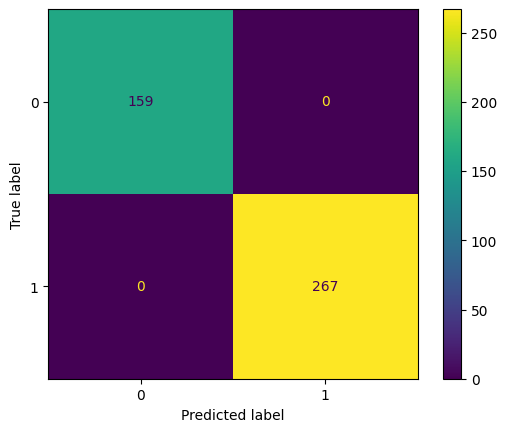

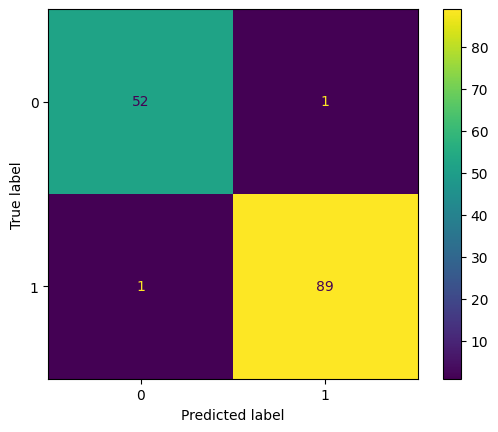

In [56]:
y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

# confusion matrix 출력 (숫자)
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# 시각화
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test)

# classification report 그대로 사용 가능
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

In [57]:
XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=0,
    early_stopping_rounds=10,
    eval_metric='logloss'
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]

xgb_clf.fit(X_tr, y_tr, eval_set=eval_set)

[0]	validation_0-logloss:0.57452	validation_1-logloss:0.60880
[1]	validation_0-logloss:0.50928	validation_1-logloss:0.55472


[2]	validation_0-logloss:0.45694	validation_1-logloss:0.50527
[3]	validation_0-logloss:0.40953	validation_1-logloss:0.46292
[4]	validation_0-logloss:0.36927	validation_1-logloss:0.42700
[5]	validation_0-logloss:0.33481	validation_1-logloss:0.39919
[6]	validation_0-logloss:0.30438	validation_1-logloss:0.37171
[7]	validation_0-logloss:0.27723	validation_1-logloss:0.34853
[8]	validation_0-logloss:0.25387	validation_1-logloss:0.32843
[9]	validation_0-logloss:0.23308	validation_1-logloss:0.30965
[10]	validation_0-logloss:0.21360	validation_1-logloss:0.29418
[11]	validation_0-logloss:0.19725	validation_1-logloss:0.28057
[12]	validation_0-logloss:0.18229	validation_1-logloss:0.26975
[13]	validation_0-logloss:0.16936	validation_1-logloss:0.25935
[14]	validation_0-logloss:0.15736	validation_1-logloss:0.24851
[15]	validation_0-logloss:0.14565	validation_1-logloss:0.23954
[16]	validation_0-logloss:0.13601	validation_1-logloss:0.23035
[17]	validation_0-logloss:0.12763	validation_1-logloss:0.22136


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


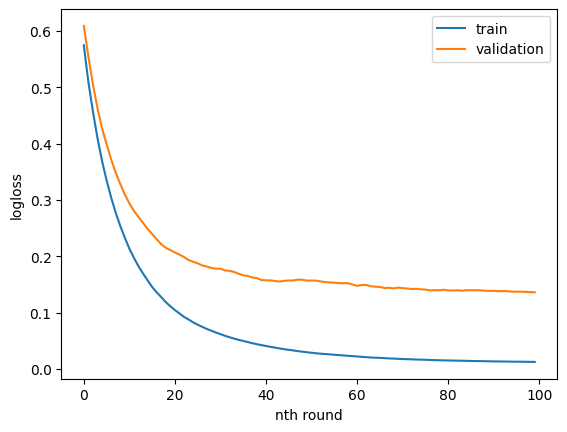

In [58]:
# 훈련과정 시각화
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()

train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()

plt.xlabel('nth round')
plt.ylabel('logloss')
plt.show()

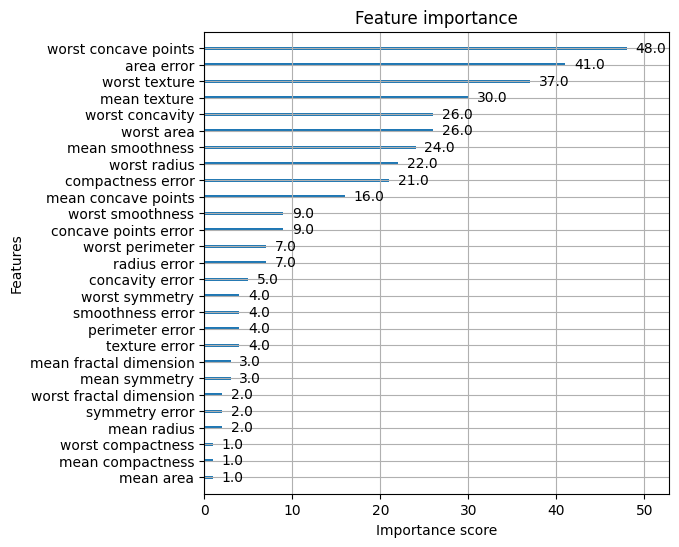

In [67]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(6, 6))
plot_importance(xgb_clf, ax=ax)
plt.show()